In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
dataset = pd.read_csv("result/features.csv")

In [3]:
dataset

,left_hip_anlge,right_hip_anlge,left_knee_anlge,right_knee_anlge,left_ankle_angle_1,left_ankle_angle_2,right_ankle_angle_1,right_ankle_angle_2,hip_x_diff,hip_y_diff,hip_depth_diff,knee_x_diff,knee_y_diff,knee_depth_diff,ankle_x_diff,ankle_y_diff,ankle_depth_diff,heel_x_diff,heel_y_diff,heel_depth_diff,footindex_x_diff,footindex_y_diff,footindex_depth_diff,hip_length,knee_length,ankle_length,heel_length,footindex_length,class
0,148.427729,150.930978,-168.393137,-168.690248,134.300391,134.300391,131.807541,178.505128,-0.154935,0.039753,-0.187853,-0.111677,0.071158,-0.402590,-0.086559,0.078057,-0.602044,-0.094615,0.075750,-0.623382,-0.134077,0.043144,-0.711437,0.159954,0.132421,0.116557,0.121203,0.140848,0
1,149.004593,151.639707,-168.831517,-169.054899,134.225455,134.225455,133.502207,178.704709,-0.157103,0.040176,-0.188175,-0.115101,0.067958,-0.397028,-0.086893,0.081261,-0.599091,-0.094910,0.079507,-0.620717,-0.136838,0.049231,-0.706496,0.162159,0.133666,0.118970,0.123811,0.145425,0
2,149.866687,154.455256,-176.729935,-169.385073,135.144423,135.144423,134.610390,177.797498,-0.160072,0.041390,-0.188153,-0.123984,0.077713,-0.419861,-0.138003,0.130128,-0.652983,-0.153209,0.133088,-0.679714,-0.201867,0.118639,-0.776193,0.165336,0.146326,0.189679,0.202942,0.234148,0
3,151.410257,157.807758,176.079346,-169.617673,136.121906,136.121906,138.617568,176.920373,-0.164717,0.043902,-0.185067,-0.139595,0.077759,-0.415213,-0.186813,0.168882,-0.656137,-0.205850,0.177334,-0.684294,-0.256229,0.183470,-0.781036,0.170467,0.159791,0.251833,0.271701,0.315142,0
4,151.174823,158.637350,178.446366,-169.004416,134.825773,134.825773,135.521153,175.881984,-0.165472,0.045260,-0.184912,-0.149083,0.079157,-0.413721,-0.197246,0.165621,-0.668280,-0.214847,0.172534,-0.697298,-0.257838,0.179778,-0.796095,0.171550,0.168795,0.257558,0.275549,0.314325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135605,-157.427835,-174.382649,156.083147,165.318717,-153.313693,-153.313693,-157.421886,-175.595635,0.120291,-0.024033,0.156783,0.145146,-0.041085,0.211738,0.129247,-0.011720,0.241204,0.118537,-0.002278,0.243925,0.129037,0.003140,0.237169,0.122668,0.150849,0.129777,0.118559,0.129075,6
135606,-157.320103,-175.574536,158.249472,165.948759,-150.804218,-150.804218,-154.879116,-174.416427,0.121045,-0.023037,0.154529,0.151879,-0.042152,0.208417,0.147009,-0.021007,0.225347,0.136814,-0.013471,0.227674,0.150352,-0.003766,0.222971,0.123218,0.157620,0.148503,0.137475,0.150400,6
135607,-157.362197,-176.931101,159.634896,168.342233,-151.106661,-151.106661,-152.636233,-174.214714,0.120728,-0.024073,0.152074,0.163874,-0.047469,0.198807,0.161221,-0.033210,0.202587,0.150978,-0.026582,0.204691,0.161430,-0.015999,0.200984,0.123104,0.170611,0.164606,0.153301,0.162221,6
135608,-157.326966,-178.706697,161.841175,170.602864,-143.695643,-143.695643,-151.358310,-173.107756,0.120841,-0.024434,0.146440,0.173938,-0.051823,0.189153,0.176363,-0.047275,0.191180,0.167116,-0.041758,0.194053,0.185956,-0.032761,0.195439,0.123286,0.181493,0.182589,0.172254,0.188819,6


In [5]:
dataset = dataset.dropna()

In [6]:
clf = setup(data = dataset, target = 'class', use_gpu = False,
            data_split_shuffle=True, normalize = True, session_id=42)

,Description,Value
0,session_id,42
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(135600, 29)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [89]:
best_5 = compare_models(sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9924,0.9999,0.9887,0.9925,0.9924,0.9905,0.9905,5.2220
et,Extra Trees Classifier,0.9944,0.9999,0.9917,0.9944,0.9944,0.9930,0.9930,1.7620
lightgbm,Light Gradient Boosting Machine,0.9823,0.9996,0.9741,0.9823,0.9822,0.9777,0.9777,2.0790
knn,K Neighbors Classifier,0.9463,0.9929,0.9226,0.9462,0.9459,0.9323,0.9324,0.9120
gbc,Gradient Boosting Classifier,0.8611,0.9836,0.8012,0.8616,0.8575,0.8232,0.8245,62.1870
dt,Decision Tree Classifier,0.9463,0.9677,0.9279,0.9462,0.9462,0.9324,0.9324,0.4930
qda,Quadratic Discriminant Analysis,0.6713,0.9225,0.6383,0.7111,0.6764,0.5943,0.6000,0.0590
ada,Ada Boost Classifier,0.5747,0.8635,0.4900,0.5739,0.5657,0.4637,0.4669,2.1040
lr,Logistic Regression,0.5673,0.8321,0.3967,0.5204,0.5124,0.4227,0.4354,3.9980
lda,Linear Discriminant Analysis,0.5460,0.8199,0.3786,0.4919,0.4845,0.3945,0.4077,0.1270


In [7]:
et = create_model('et')
tuned_et = tune_model(et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7219,0.9640,0.5628,0.7472,0.6904,0.6309,0.6458
1,0.7205,0.9625,0.5668,0.7488,0.6922,0.6292,0.6437
2,0.7190,0.9619,0.5580,0.7485,0.6867,0.6267,0.6420
3,0.7190,0.9607,0.5620,0.7442,0.6891,0.6275,0.6417
4,0.7220,0.9631,0.5649,0.7491,0.6917,0.6310,0.6459
5,0.7198,0.9619,0.5651,0.7432,0.6906,0.6289,0.6423
6,0.7303,0.9630,0.5782,0.7581,0.7027,0.6428,0.6568
7,0.7183,0.9615,0.5586,0.7453,0.6858,0.6262,0.6408
8,0.7133,0.9617,0.5530,0.7401,0.6812,0.6191,0.6343


In [8]:
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8485,0.9895,0.7628,0.8601,0.8412,0.8042,0.8095
1,0.8416,0.9881,0.7532,0.8546,0.8343,0.7949,0.8006
2,0.8436,0.9886,0.7550,0.8577,0.8362,0.7975,0.8034
3,0.8484,0.9887,0.7624,0.8598,0.8413,0.8041,0.8092
4,0.8475,0.9890,0.7624,0.8596,0.8405,0.8027,0.8082
5,0.8438,0.9883,0.7568,0.8556,0.8366,0.7980,0.8033
6,0.8528,0.9893,0.7701,0.8649,0.8465,0.8098,0.8151
7,0.8479,0.9886,0.7595,0.8598,0.8403,0.8032,0.8086
8,0.8489,0.9889,0.7624,0.8614,0.8419,0.8047,0.8101


In [9]:
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9930,0.9999,0.9889,0.9930,0.9930,0.9913,0.9913
1,0.9940,0.9999,0.9905,0.9940,0.9940,0.9924,0.9925
2,0.9919,0.9999,0.9874,0.9919,0.9919,0.9898,0.9898
3,0.9926,0.9999,0.9888,0.9926,0.9926,0.9907,0.9907
4,0.9934,0.9999,0.9899,0.9934,0.9934,0.9917,0.9917
5,0.9935,0.9999,0.9902,0.9935,0.9935,0.9918,0.9918
6,0.9928,0.9999,0.9899,0.9928,0.9928,0.9910,0.9910
7,0.9930,0.9999,0.9898,0.9930,0.9930,0.9913,0.9913
8,0.9902,0.9999,0.9849,0.9902,0.9902,0.9877,0.9877


In [10]:
knn = create_model('knn')
tuned_knn = tune_model(knn, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9549,0.9969,0.9342,0.9549,0.9546,0.9432,0.9433
1,0.9496,0.9958,0.9270,0.9498,0.9492,0.9365,0.9366
2,0.9484,0.9960,0.9245,0.9484,0.9479,0.9348,0.9350
3,0.9511,0.9959,0.9300,0.9513,0.9507,0.9383,0.9385
4,0.9545,0.9973,0.9352,0.9544,0.9542,0.9426,0.9427
5,0.9522,0.9963,0.9336,0.9523,0.9520,0.9398,0.9398
6,0.9536,0.9962,0.9328,0.9538,0.9533,0.9416,0.9417
7,0.9497,0.9968,0.9268,0.9495,0.9493,0.9366,0.9367
8,0.9534,0.9962,0.9334,0.9533,0.9531,0.9413,0.9414


In [ ]:
#gbc = create_model('gbc')
#tuned_gbc = tune_model(gbc, optimize='AUC')

In [11]:
blender = blend_models(estimator_list = [tuned_et,
                                         tuned_rf,
                                         tuned_lightgbm,
                                         tuned_knn])
#final_model = finalize_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,0.9996,0.9695,0.9816,0.9813,0.9766,0.9767
1,0.9800,0.9995,0.9685,0.9803,0.9799,0.9748,0.9748
2,0.9775,0.9994,0.9646,0.9778,0.9773,0.9716,0.9717
3,0.9794,0.9995,0.9672,0.9797,0.9792,0.9740,0.9741
4,0.9819,0.9996,0.9710,0.9821,0.9818,0.9772,0.9772
5,0.9810,0.9994,0.9707,0.9812,0.9809,0.9761,0.9762
6,0.9812,0.9995,0.9703,0.9815,0.9812,0.9764,0.9764
7,0.9802,0.9994,0.9678,0.9804,0.9801,0.9750,0.9751
8,0.9817,0.9994,0.9706,0.9818,0.9816,0.9769,0.9770


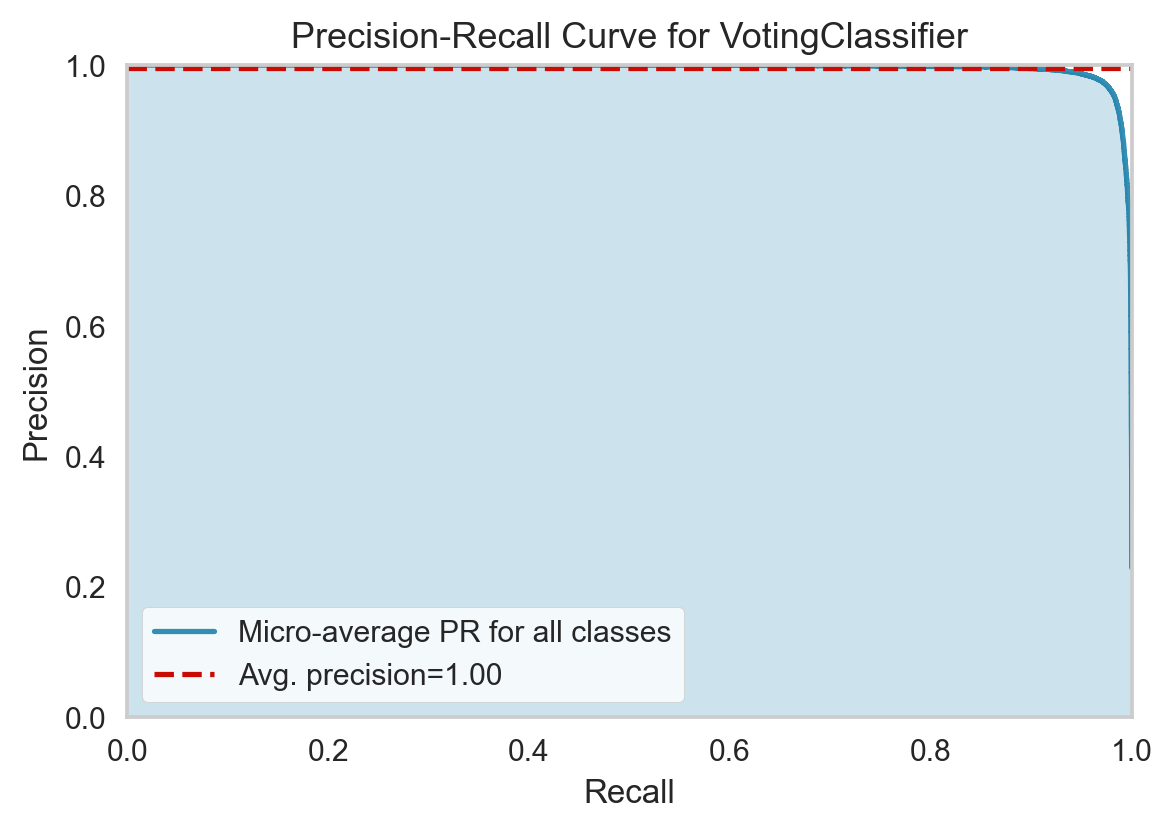

In [25]:
plot_model(blender, plot = 'pr', scale = 3)

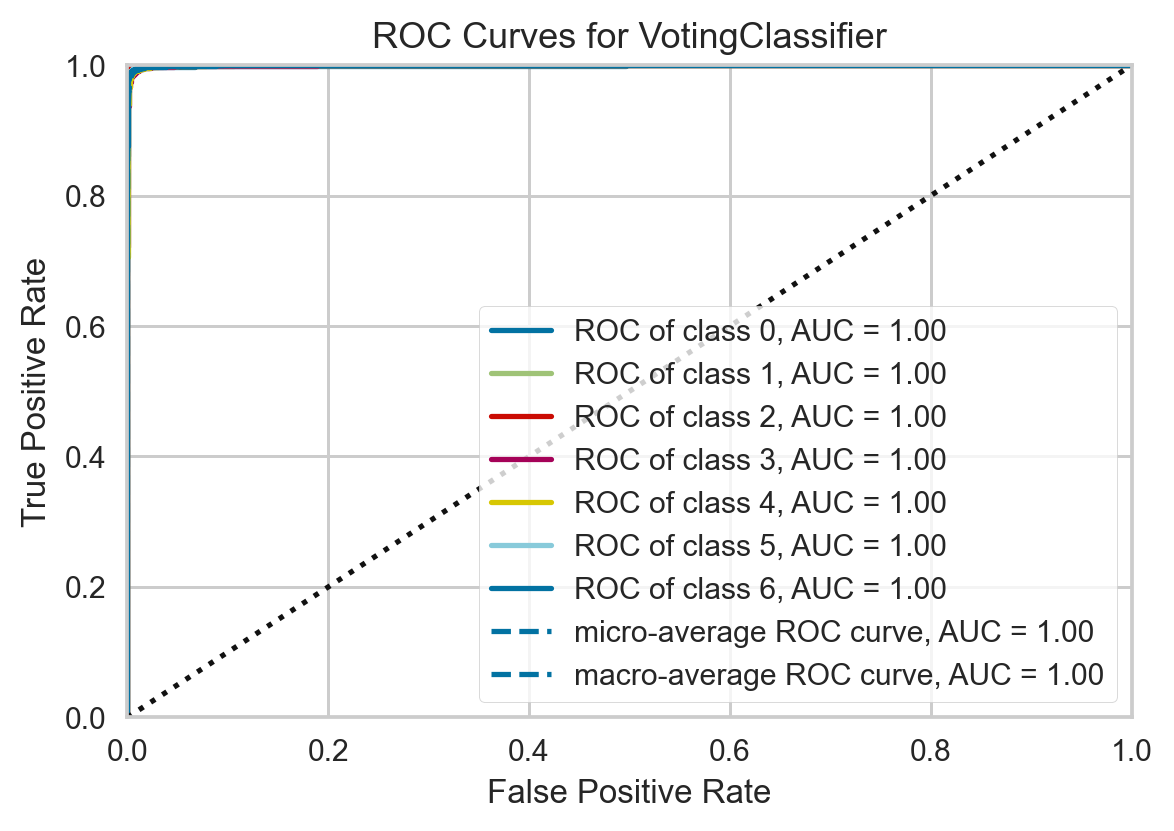

In [12]:
plot_model(blender, plot = 'auc', scale = 3)

In [ ]:
save_model(final_model, 'emsemble_model')

In [12]:
dataset.iloc[:5, :28]

,left_hip_anlge,right_hip_anlge,left_knee_anlge,right_knee_anlge,left_ankle_angle_1,left_ankle_angle_2,right_ankle_angle_1,right_ankle_angle_2,hip_x_diff,hip_y_diff,...,heel_y_diff,heel_depth_diff,footindex_x_diff,footindex_y_diff,footindex_depth_diff,hip_length,knee_length,ankle_length,heel_length,footindex_length
0,148.427729,150.930978,-168.393137,-168.690248,134.300391,134.300391,131.807541,178.505128,-0.154935,0.039753,...,0.075750,-0.623382,-0.134077,0.043144,-0.711437,0.159954,0.132421,0.116557,0.121203,0.140848
1,149.004593,151.639707,-168.831517,-169.054899,134.225455,134.225455,133.502207,178.704709,-0.157103,0.040176,...,0.079507,-0.620717,-0.136838,0.049231,-0.706496,0.162159,0.133666,0.118970,0.123811,0.145425
2,149.866687,154.455256,-176.729935,-169.385073,135.144423,135.144423,134.610390,177.797498,-0.160072,0.041390,...,0.133088,-0.679714,-0.201867,0.118639,-0.776193,0.165336,0.146326,0.189679,0.202942,0.234148
3,151.410257,157.807758,176.079346,-169.617673,136.121906,136.121906,138.617568,176.920373,-0.164717,0.043902,...,0.177334,-0.684294,-0.256229,0.183470,-0.781036,0.170467,0.159791,0.251833,0.271701,0.315142
4,151.174823,158.637350,178.446366,-169.004416,134.825773,134.825773,135.521153,175.881984,-0.165472,0.045260,...,0.172534,-0.697298,-0.257838,0.179778,-0.796095,0.171550,0.168795,0.257558,0.275549,0.314325


In [13]:
predict = predict_model(final_model, data = dataset.iloc[:5, :28])

In [14]:
predict

,left_hip_anlge,right_hip_anlge,left_knee_anlge,right_knee_anlge,left_ankle_angle_1,left_ankle_angle_2,right_ankle_angle_1,right_ankle_angle_2,hip_x_diff,hip_y_diff,...,footindex_x_diff,footindex_y_diff,footindex_depth_diff,hip_length,knee_length,ankle_length,heel_length,footindex_length,Label,Score
0,148.427729,150.930978,-168.393137,-168.690248,134.300391,134.300391,131.807541,178.505128,-0.154935,0.039753,...,-0.134077,0.043144,-0.711437,0.159954,0.132421,0.116557,0.121203,0.140848,0,0.6275
1,149.004593,151.639707,-168.831517,-169.054899,134.225455,134.225455,133.502207,178.704709,-0.157103,0.040176,...,-0.136838,0.049231,-0.706496,0.162159,0.133666,0.118970,0.123811,0.145425,0,0.6311
2,149.866687,154.455256,-176.729935,-169.385073,135.144423,135.144423,134.610390,177.797498,-0.160072,0.041390,...,-0.201867,0.118639,-0.776193,0.165336,0.146326,0.189679,0.202942,0.234148,0,0.6436
3,151.410257,157.807758,176.079346,-169.617673,136.121906,136.121906,138.617568,176.920373,-0.164717,0.043902,...,-0.256229,0.183470,-0.781036,0.170467,0.159791,0.251833,0.271701,0.315142,0,0.6635
4,151.174823,158.637350,178.446366,-169.004416,134.825773,134.825773,135.521153,175.881984,-0.165472,0.045260,...,-0.257838,0.179778,-0.796095,0.171550,0.168795,0.257558,0.275549,0.314325,0,0.6528


In [15]:
loaded_model = load_model('model/model_2022_08_15_9_43')

Transformation Pipeline and Model Successfully Loaded


In [37]:
predict = predict_model(loaded_model, data = dataset.iloc[:1,:28])

In [38]:
predict

,left_hip_anlge,right_hip_anlge,left_knee_anlge,right_knee_anlge,left_ankle_angle_1,left_ankle_angle_2,right_ankle_angle_1,right_ankle_angle_2,hip_x_diff,hip_y_diff,...,footindex_x_diff,footindex_y_diff,footindex_depth_diff,hip_length,knee_length,ankle_length,heel_length,footindex_length,Label,Score
0,148.427729,150.930978,-168.393137,-168.690248,134.300391,134.300391,131.807541,178.505128,-0.154935,0.039753,...,-0.134077,0.043144,-0.711437,0.159954,0.132421,0.116557,0.121203,0.140848,0,0.6527


### Test with Demo

In [1]:
import module.feature_extract as feature
import pandas as pd
import module.visualize as visualize

In [19]:
normalize = feature.extract_keypoint(path = "demo/demo.mp4", show_video = True)

Done [demo/demo.mp4] 


In [20]:
normalize

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.189573,-0.597068,-0.163225,0.164992,-0.641987,-0.153325,0.165396,-0.642102,-0.152595,0.165288,...,0.219943,-0.074937,0.806014,0.040866,0.054205,0.828724,0.167491,0.042717,0.835529,-0.055435
1,0.193588,-0.603334,-0.149474,0.167534,-0.646749,-0.137942,0.167917,-0.646882,-0.137253,0.167712,...,0.205442,-0.085021,0.802507,0.035435,0.042096,0.823012,0.151791,0.023676,0.831995,-0.059656
2,0.211302,-0.615537,-0.139884,0.186049,-0.658645,-0.128379,0.186389,-0.658804,-0.127688,0.186094,...,0.213280,-0.098092,0.792451,0.047457,0.034728,0.805992,0.166923,0.011385,0.824457,-0.049063
3,0.217025,-0.623345,-0.139500,0.192396,-0.666512,-0.128613,0.192676,-0.666626,-0.127903,0.192430,...,0.213796,-0.129218,0.782278,0.070536,0.084782,0.796275,0.167291,-0.022285,0.816900,-0.034294
4,0.217587,-0.621558,-0.133263,0.193579,-0.664917,-0.123402,0.193843,-0.665022,-0.122657,0.193650,...,0.213007,-0.149983,0.771653,0.102458,0.119917,0.781949,0.166544,-0.048812,0.805134,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.172675,-0.603860,-0.098230,0.157629,-0.645690,-0.085949,0.157888,-0.645668,-0.085247,0.157707,...,0.252255,-0.020252,0.797077,0.084293,0.047086,0.842310,0.200128,0.080760,0.829856,0.010952
135,0.172800,-0.604111,-0.100596,0.157548,-0.645890,-0.088546,0.157805,-0.645877,-0.087849,0.157620,...,0.253856,-0.019843,0.797681,0.083454,0.046662,0.837415,0.203124,0.081989,0.829422,0.009869
136,0.172851,-0.603654,-0.103807,0.157453,-0.645369,-0.092017,0.157710,-0.645374,-0.091318,0.157522,...,0.252636,-0.020226,0.800890,0.083016,0.044516,0.837369,0.202032,0.082571,0.832004,0.007272
137,0.172274,-0.601551,-0.108398,0.156698,-0.643332,-0.096937,0.156964,-0.643359,-0.096241,0.156786,...,0.249989,-0.020457,0.802043,0.076922,0.044526,0.836991,0.199022,0.083109,0.832080,-0.003527


In [21]:
test = feature.cut_dataframe(normalize, drop = 0.1)

In [22]:
feature_angle = feature.compute_angle_feature(dataframe = test)
feature_diff =  feature.compute_diff_feature(dataframe = test)
feature_len = feature.compute_len_feature(dataframe = test)

In [23]:
feature_angle

,left_hip_anlge,right_hip_anlge,left_knee_anlge,right_knee_anlge,left_ankle_angle_1,left_ankle_angle_2,right_ankle_angle_1,right_ankle_angle_2
0,147.743048,174.161948,-154.043192,-143.722239,110.984327,110.984327,112.062135,175.676781
1,150.528381,174.497663,-150.370046,-141.708547,110.046913,110.046913,108.799576,174.998022
2,155.086253,172.006904,-149.363700,-138.639727,110.564237,110.564237,117.500633,176.373727
3,165.663575,165.628479,-153.281255,-127.547129,112.862394,112.862394,99.777352,151.633175
4,173.941135,159.772110,-153.188453,-139.795327,113.746881,113.746881,120.467747,173.042450
...,...,...,...,...,...,...,...,...
108,-172.170965,168.341667,-179.119541,-168.038770,107.290808,107.290808,111.191639,-178.924254
109,-171.520203,170.150912,-179.005253,-168.763586,107.429571,107.429571,110.606007,-178.690740
110,-170.754421,171.147293,179.136192,-169.102351,110.138087,110.138087,111.196664,-178.490809
111,-169.551984,172.640225,176.733766,-170.075462,114.327174,114.327174,112.116295,-178.650144


In [24]:
feature = pd.concat([feature_angle, feature_diff, feature_len], axis = 1)

In [25]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   left_hip_anlge        113 non-null    float64
 1   right_hip_anlge       113 non-null    float64
 2   left_knee_anlge       113 non-null    float64
 3   right_knee_anlge      113 non-null    float64
 4   left_ankle_angle_1    113 non-null    float64
 5   left_ankle_angle_2    113 non-null    float64
 6   right_ankle_angle_1   113 non-null    float64
 7   right_ankle_angle_2   113 non-null    float64
 8   hip_x_diff            113 non-null    float64
 9   hip_y_diff            113 non-null    float64
 10  hip_depth_diff        113 non-null    float64
 11  knee_x_diff           113 non-null    float64
 12  knee_y_diff           113 non-null    float64
 13  knee_depth_diff       113 non-null    float64
 14  ankle_x_diff          113 non-null    float64
 15  ankle_y_diff          1

In [26]:
loaded_model = load_model('model/model_2022_08_15_9_43')

Transformation Pipeline and Model Successfully Loaded


In [27]:
result = predict_model(loaded_model, data = feature)

In [28]:
result

,left_hip_anlge,right_hip_anlge,left_knee_anlge,right_knee_anlge,left_ankle_angle_1,left_ankle_angle_2,right_ankle_angle_1,right_ankle_angle_2,hip_x_diff,hip_y_diff,...,footindex_x_diff,footindex_y_diff,footindex_depth_diff,hip_length,knee_length,ankle_length,heel_length,footindex_length,Label,Score
0,147.743048,174.161948,-154.043192,-143.722239,110.984327,110.984327,112.062135,175.676781,-0.065960,-0.010261,...,-0.849320,-0.031681,-0.344066,0.066753,0.345459,0.705816,0.771866,0.849911,5,0.7139
1,150.528381,174.497663,-150.370046,-141.708547,110.046913,110.046913,108.799576,174.998022,-0.064592,-0.011621,...,-0.782135,-0.060747,-0.391678,0.065629,0.325217,0.656275,0.704872,0.784491,5,0.7114
2,155.086253,172.006904,-149.363700,-138.639727,110.564237,110.564237,117.500633,176.373727,-0.063926,-0.012160,...,-0.685388,-0.084068,-0.457050,0.065072,0.278839,0.565716,0.610403,0.690524,5,0.6806
3,165.663575,165.628479,-153.281255,-127.547129,112.862394,112.862394,99.777352,151.633175,-0.060510,-0.014128,...,-0.498311,-0.082447,-0.347405,0.062137,0.157458,0.447754,0.466368,0.505086,5,0.4911
4,173.941135,159.772110,-153.188453,-139.795327,113.746881,113.746881,120.467747,173.042450,-0.057946,-0.014511,...,-0.100808,-0.044991,-0.243288,0.059735,0.053474,0.112942,0.121654,0.110392,6,0.3461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,-172.170965,168.341667,-179.119541,-168.038770,107.290808,107.290808,111.191639,-178.924254,0.015551,0.003773,...,0.061117,0.041002,-0.263854,0.016002,0.078797,0.068744,0.060513,0.073597,5,0.5160
109,-171.520203,170.150912,-179.005253,-168.763586,107.429571,107.429571,110.606007,-178.690740,0.016100,0.003590,...,0.058507,0.037847,-0.262835,0.016496,0.074464,0.064778,0.056234,0.069681,5,0.5124
110,-170.754421,171.147293,179.136192,-169.102351,110.138087,110.138087,111.196664,-178.490809,0.016384,0.003562,...,0.055060,0.036797,-0.263396,0.016767,0.077866,0.062074,0.054394,0.066224,5,0.5030
111,-169.551984,172.640225,176.733766,-170.075462,114.327174,114.327174,112.116295,-178.650144,0.015895,0.003790,...,0.060528,0.033568,-0.254569,0.016341,0.081695,0.060720,0.054830,0.069213,5,0.5135


* 0 : 'Ataxic_Gait'
* 1 :  'Choreiform_Gait'
* 2 :  'Diplegic_Gait'
* 3 :  'Hemiplegic_Gait'
* 4 :  'Neuropathic_Gait'
* 5 :  'Normal_gait'
* 6 :  'Parkinsonian_Gait'


In [29]:
gait_list = ['Ataxic_Gait',
 'Choreiform_Gait',
 'Diplegic_Gait',
 'Hemiplegic_Gait',
 'Neuropathic_Gait',
 'Normal_gait',
 'Parkinsonian_Gait']

In [3]:
gait_map = { 0 : 'Ataxic_Gait',
 1 : 'Choreiform_Gait',
 2 : 'Diplegic_Gait',
 3 : 'Hemiplegic_Gait',
 4 : 'Neuropathic_Gait',
 5 : 'Normal_gait',
 6 : 'Parkinsonian_Gait'
}

In [31]:
check_result = pd.Series(result["Label"].value_counts())
check_result = check_result.to_dict()
gait = 0

In [32]:
check_result

{5: 100, 1: 4, 6: 3, 4: 3, 3: 3}

In [33]:
for i in check_result.keys():
    if(gait < check_result[i]):
        gait = check_result[i]
        label = i
    print("%s : %f %%" % (gait_map[i], (float(check_result[i]) / float(len(result))) * 100))
    
acc = (float(gait) / float(len(result))) * 100
print("============================================")
print("Result : %s / %f %%" % (gait_map[label], acc))
print("============================================")


Normal_gait : 88.495575 %
Choreiform_Gait : 3.539823 %
Parkinsonian_Gait : 2.654867 %
Neuropathic_Gait : 2.654867 %
Hemiplegic_Gait : 2.654867 %
Result : Normal_gait / 88.495575 %


In [6]:
visualize.visualizer(video_path = "demo/demo.mp4", webcam = False, show_keypoint = True, model_path = "model/emsemble_model",
               save_path = "demo/", save_name ="demo_visualize", class_dict = gait_map)


Transformation Pipeline and Model Successfully Loaded
Done
